One way to handle this is to trim off accounts above and below a certain range. We trim off incredibly high follower accounts as outliers, and we trim out very low follower accounts as noise within the data. This is very much an art rather than a science!

In [17]:
df[subset].describe(percentiles=[0.9,0.99,0.999, 0.9999])

,id,user.followers_count,favorite_count,retweet_count
count,4.658000e+03,4.658000e+03,4658.000000,4658.000000
mean,1.329150e+18,7.362115e+04,249.453199,50.468227
std,1.302000e+16,1.077477e+06,1964.622280,438.713522
min,6.522691e+17,0.000000e+00,0.000000,0.000000
50%,1.329727e+18,1.393000e+03,2.000000,0.000000
90%,1.330130e+18,3.043630e+04,181.000000,41.000000
99%,1.330137e+18,7.558273e+05,5015.240000,1072.310000
99.9%,1.330160e+18,7.653992e+06,30253.921000,5045.858000
99.99%,1.330160e+18,4.661530e+07,56051.645000,15108.330500
max,1.330160e+18,4.661536e+07,67764.000000,21691.000000


Lets filter out anyone in the bottom 50% of followers, and anyone in the top 0.1%.

In [18]:
trim_val = 'user.followers_count'
bottom_trim = df[trim_val].quantile(0.50)
upper_trim = df[trim_val].quantile(0.99)

trim_filter = (bottom_trim < df[trim_val]) & (df[trim_val] < upper_trim)

In [19]:
trim_df = df[trim_filter]
trim_df[subset].describe()

,id,user.followers_count,favorite_count,retweet_count
count,2.282000e+03,2282.000000,2282.000000,2282.000000
mean,1.328436e+18,32720.843996,440.992550,92.922875
std,1.849292e+16,92463.860939,2445.485495,593.731765
min,6.522691e+17,1394.000000,0.000000,0.000000
25%,1.329702e+18,2820.250000,2.000000,0.000000
50%,1.329773e+18,5878.500000,13.000000,3.000000
75%,1.330111e+18,17920.000000,98.750000,23.750000
max,1.330160e+18,755826.000000,67764.000000,21691.000000


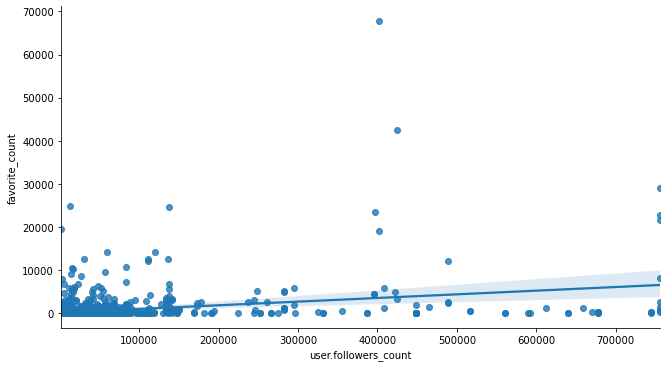

In [20]:
plot = sns.lmplot(data=trim_df,x='user.followers_count',y='favorite_count',fit_reg=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

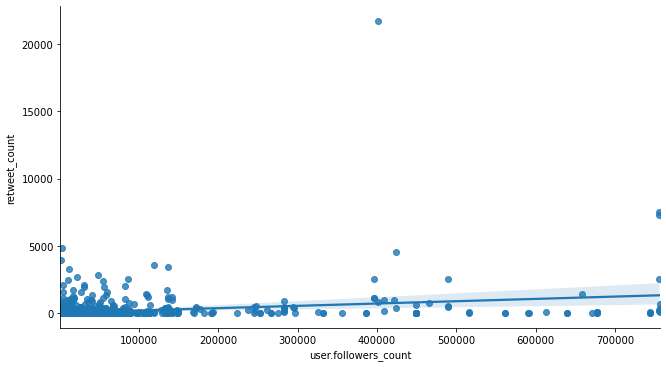

In [21]:
plot = sns.lmplot(data=trim_df,x='user.followers_count',y='retweet_count',fit_reg=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In general, it often doesn't make too much difference to the trends we see.